### Steps that are followed
        1. Read and understand the data
        2. Clean the data
        3. Prepare the data for Model Building
        4. Model Building
        5. Model Evaluation
        6. Making Predictions on the Test Set

In [1]:
# Ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

# Importing necessary libraries 
import numpy as np
import pandas as pd

import time, warnings
import datetime as dt

from IPython.display import display
pd.options.display.max_columns = None

## 1. Read and understand the data

In [2]:

xleads = pd.read_csv("C:/Users/swarangi/Downloads/Lead+Scoring+Case+Study/Lead Scoring Assignment/Leads.csv")  # Look at the first few entries
xleads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#Observe the shape of the data 
xleads.shape

(9240, 37)

In [4]:
# Inspect the different columsn in the dataset

xleads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [5]:
# Inspect the statistics 
xleads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Check the summary of the dataset

xleads.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,NaN,NaN,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [7]:
# Inspect the feature variables and if the null values present

xleads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### 2. Data Cleaning and Preparation

In [8]:
# Check the number of missing values in each column

xleads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

As there are 9024 data points and many columns have null values with count more than 3000+ 
such columns are not useful for the analysis hence can be dropped.

In [9]:
# Drop all the columns with missing values > 3000 are present
threshold = 3000
xleads = xleads.dropna(axis=1, thresh=len(xleads) - threshold)

In [10]:
# Check the shape again
xleads.shape

(9240, 31)

In [11]:
# Check the number of null values again

xleads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

The variable Country won't be of any use in our analysis. So it's best that we drop it.

In [12]:
xleads.drop(['Country'], axis = 1, inplace = True)

In [13]:
# Similarly drop the variable 'City'
xleads.drop(['City'], axis = 1, inplace = True)

In [14]:
# Percentage of missing values in each column

round(100*(xleads.isnull().sum()/len(xleads.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

There are a few columns with row values labeled as'Select'. These are the values which student had not selected the option while filling out the details.These values can be considered as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.

In [15]:
# Get the value counts of all the columns

for column in xleads:
    print(xleads[column].astype('category').value_counts())
    print('___________________________________________________')

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
___________________________________________________
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
___________________________________________________
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64


The following three columns now have the label 'Select'. Let's check them once again.

In [16]:
xleads['Lead Profile'].astype('category').value_counts()

Lead Profile
Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [17]:
xleads['How did you hear about X Education'].value_counts()

How did you hear about X Education
Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: count, dtype: int64

In [18]:
xleads['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

Lbels "Lead Profile" and "How did you hear about X Education" have a lot of rows which have the value Select which is of no use to the analysis so need to drop these values.

In [19]:
xleads.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

There were a few columns in which only one value is majorly present for all the data points. 
These include Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque. 
Since practically all of the values for these variables are No, it's best to drop these columns as they won't help with the analysis.

In [20]:
xleads.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

Also, the variable "What matters most to you in choosing a course" has the value "Better Career Prospects" 6528 times while the other two values appear once twice and once respectively. So this variable should also be dropped.

In [21]:
xleads['What matters most to you in choosing a course'].value_counts()

What matters most to you in choosing a course
Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [22]:
# Drop the null value rows present in the variable 'What matters most to you in choosing a course'

xleads.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [23]:
# Check the number of null values again

xleads.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

The column :What is your current occupation" which has a lot of null values. Now you can drop the entire row but since we have already lost so many feature variables, we choose not to drop it as it might turn out to be significant in the analysis. So let's just drop the null rows for the column What is you current occupation.

In [24]:
xleads = xleads[~pd.isnull(xleads['What is your current occupation'])]

In [25]:
# Check the number of null values again

xleads.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

Let us drop null values in all the rows since number of null counts are small enough now.

In [26]:
# Drop the null value rows in the column 'TotalVisits'

xleads = xleads[~pd.isnull(xleads['TotalVisits'])]

In [27]:
# Check the null values again

xleads.isnull().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [28]:
# Drop the null values rows in the column 'Lead Source'

xleads = xleads[~pd.isnull(xleads['Lead Source'])]

# Drop the null values rows in the column 'Specialization'

xleads = xleads[~pd.isnull(xleads['Specialization'])]

In [29]:
# Check the number of null values again

xleads.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

Percetnage number of rows that are available for analysis 

In [30]:
print(len(xleads.index))
print(len(xleads.index)/9240)

6373
0.6897186147186147


So around 69% of the data is available for the anaylsis.

In [31]:
# How data-set looks now

xleads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


The variables `Prospect ID` and `Lead Number` won't be of any use in the analysis, so we can drop these two variables also. 

In [32]:
xleads.drop(columns=['Prospect ID', 'Lead Number'], inplace=True)

In [33]:
xleads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


###  3. Prepare the data for Model Building

Analyze and display pairwise relationships between numerical variables in the dataset.

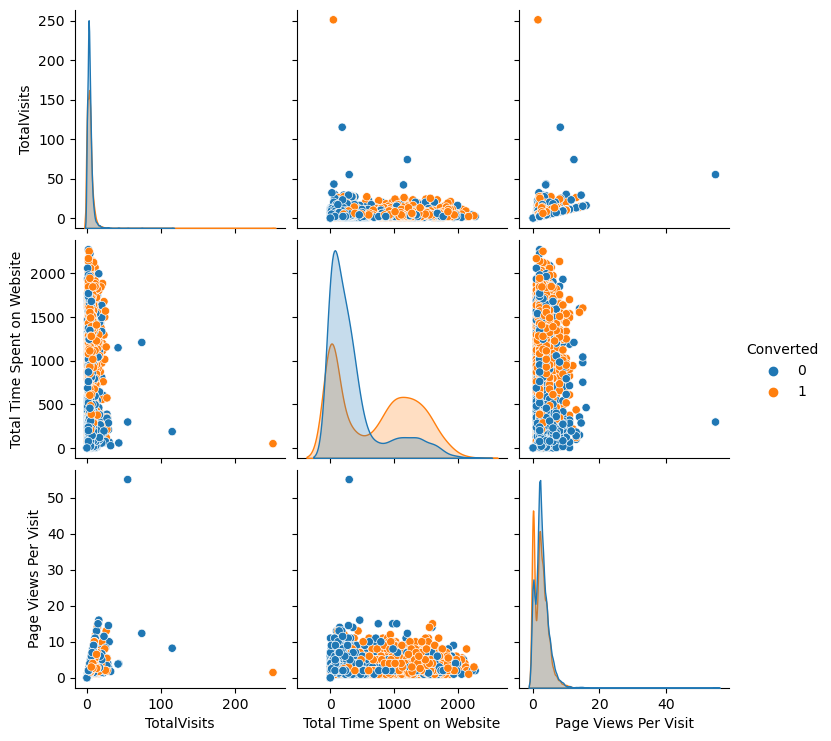

In [34]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(xleads,diag_kind='kde',hue='Converted')
plt.show()

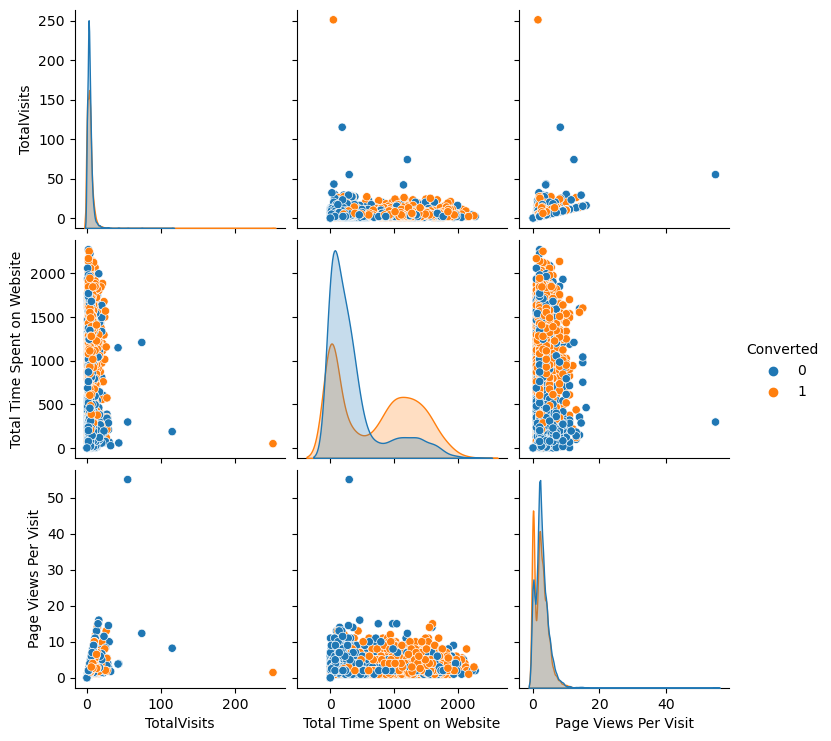

In [35]:
xedu = xleads[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(xedu,diag_kind='kde',hue='Converted')
plt.show()

In [36]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformedxedu = pd.DataFrame(pt.fit_transform(xedu))
transformedxedu.columns = xedu.columns
transformedxedu.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,-1.539988,-1.532509,-1.534722,-0.962570
1,0.690854,0.641870,0.230818,-0.962570
2,-0.219742,1.262512,-0.019004,1.038885
3,-0.723932,0.153656,-0.629842,-0.962570
4,-0.219742,1.204175,-0.629842,1.038885


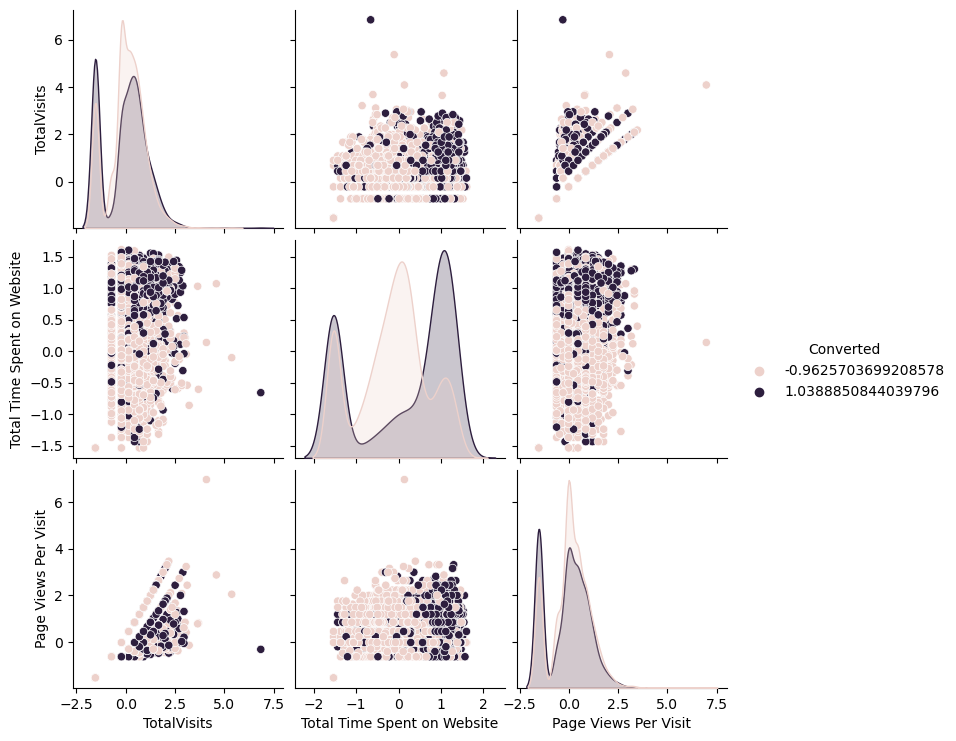

In [37]:
sns.pairplot(transformedxedu, diag_kind='kde', hue='Converted')
plt.show()

### Creating Dummy variables

For categorical valiables 

In [38]:
# Check the columns which are of type 'object'

temp = xleads.loc[:, xleads.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [39]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(xleads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
xleads = pd.concat([xleads, dummy], axis=1)

In [40]:
# Creating dummy variable separately for the variable 'Specialization' since it has the label 'Select' which is useless so we
# drop that level by specifying it explicitly

dummy_spl = pd.get_dummies(xleads['Specialization'], prefix='Specialization', drop_first=True)
xleads = pd.concat([xleads, dummy_spl], axis=1)

In [41]:
# Drop the variables for which the dummy variables have been created

columns_to_drop = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity']
xleads = xleads.drop(columns=columns_to_drop)

In [140]:
# Let's look at the dataset now 
xleads = xleads.astype(int)
xleads.head()
xleads.shape

(6373, 75)

### Test-Train Split

In [43]:
# Import the required library

from sklearn.model_selection import train_test_split

In [44]:
# Put all the feature variables in X

X = xleads.drop(columns=['Converted'])
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,5,674,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2,1532,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,305,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2,1428,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [45]:
# Put the target variable in y

y = xleads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int32

In [46]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling

In [47]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [48]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_testone,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Select,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
218,0.015936,0.082306,0.250,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3660,0.000000,0.000000,0.000,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Analyzing Correlations

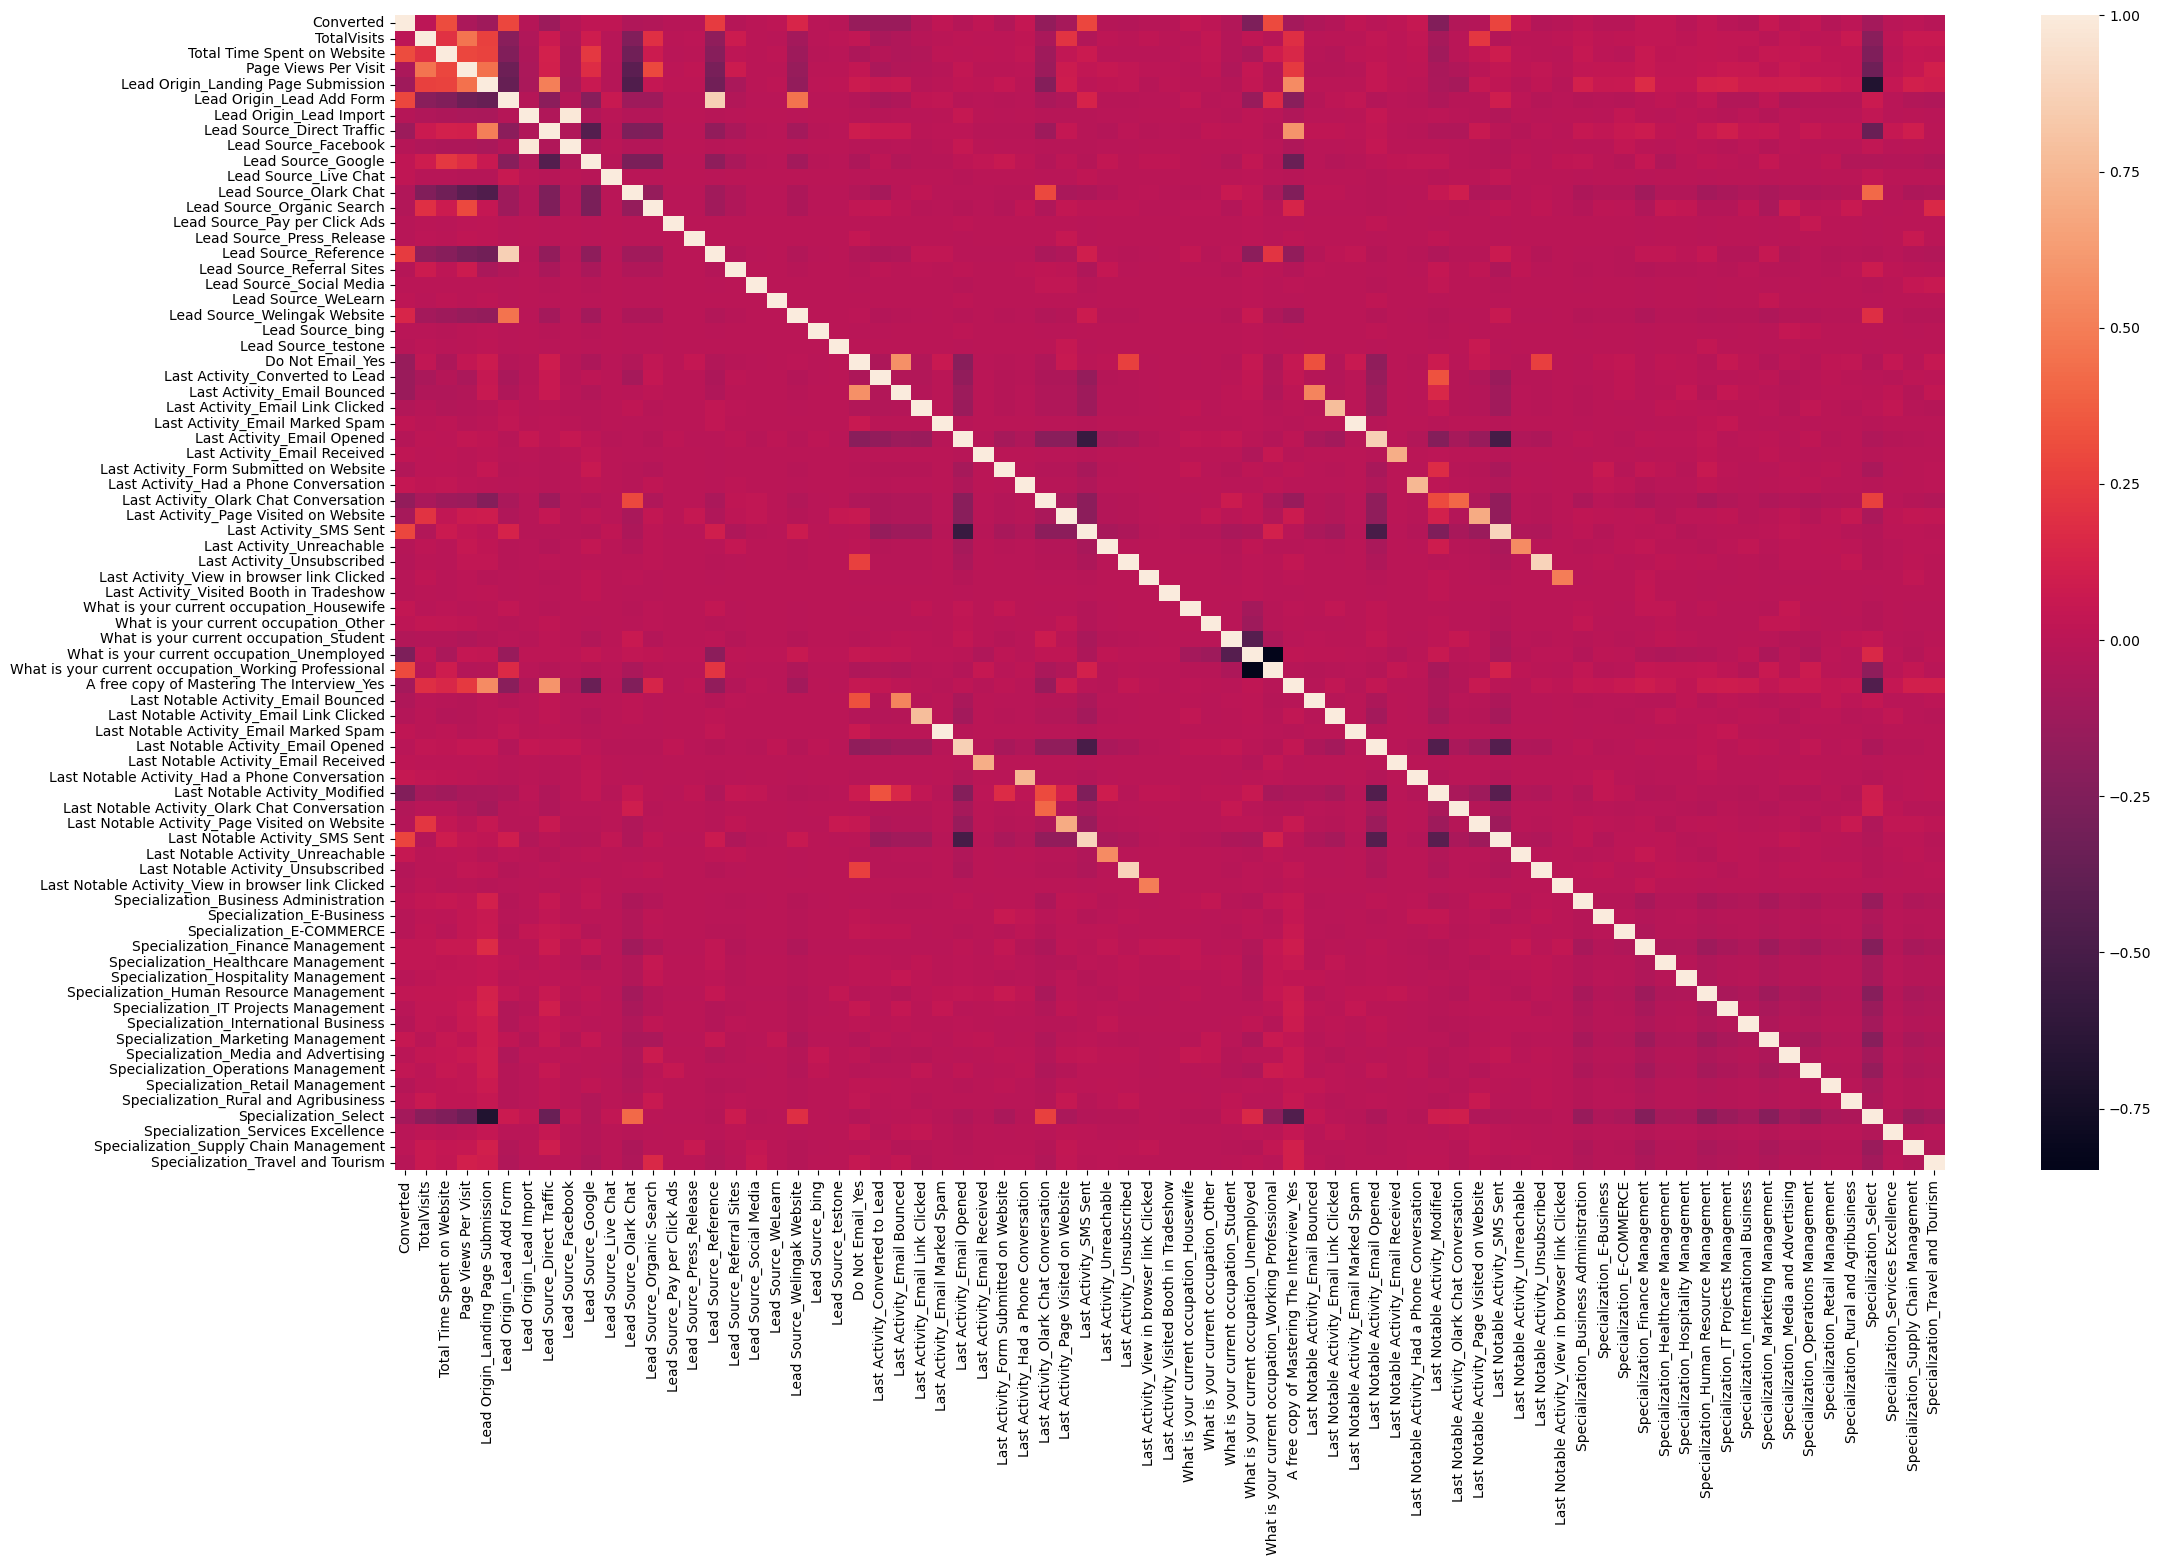

In [49]:
# Looking at the correlation table
plt.figure(figsize = (25,15))
sns.heatmap(xleads.corr())
plt.show()

### 4. Building the Model 

In [50]:
# Using RFE for feature selection since there are so many variables 
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [51]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)  # Running RFE with 15 variables as output
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [52]:
# Lisitng features that are selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 9),
 ('Lead Origin_Landing Page Submission', False, 4),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 50),
 ('Lead Source_Direct Traffic', False, 13),
 ('Lead Source_Facebook', False, 45),
 ('Lead Source_Google', False, 35),
 ('Lead Source_Live Chat', False, 29),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 34),
 ('Lead Source_Pay per Click Ads', False, 33),
 ('Lead Source_Press_Release', False, 53),
 ('Lead Source_Reference', False, 7),
 ('Lead Source_Referral Sites', False, 41),
 ('Lead Source_Social Media', False, 57),
 ('Lead Source_WeLearn', False, 25),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 22),
 ('Lead Source_testone', False, 28),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 6),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Cli

In [53]:
# Store all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [54]:
# Select only the columns selected by RFE

X_train = X_train[col]

Let us build a model using variables selected by RFE using statsmodel 

In [55]:
# Import statsmodels

import statsmodels.api as sm

In [56]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2057.0
Date:                Mon, 22 Jul 2024   Deviance:                       4113.9
Time:                        11:42:01   Pearson chi2:                 4.66e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3705
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4408      0.554     -0.795      0.426      -1.527       0.646
TotalVisits                                             10.5051      2.654      3.958      0.000       5.304      15.706
Total Time Spent on Website                              4.4342      0.186     23.847      0.000       4.070       4.799
Lead Origin_Lead Add Form                                4.2573      0.260     16.402      0.000       3.749       4.766
Lead Source_Olark Chat                                   1.4320      0.122     11.737      0.000       1.193       1.671
Lead Source_Welingak Website                             2.1931      1.038      2.114      0.035       0.159       4.227
Do Not Email_Yes                                        -1.4084      0.223     -6.309      0.000      -1.846      -0.971
Last Activity_Email Bounced                             -1.4785      0.660     -2.239      0.025      -2.773      -0.184
Last Activity_Had a Phone Conversation                   1.0154      0.983      1.033      0.301      -0.911       2.941
What is your current occupation_Student                 -1.7035      0.589     -2.892      0.004      -2.858      -0.549
What is your current occupation_Unemployed              -1.8630      0.550     -3.386      0.001      -2.941      -0.785
What is your current occupation_Working Professional     0.7456      0.582      1.282      0.200      -0.394       1.886
Last Notable Activity_Email Bounced                      2.0849      0.794      2.626      0.009       0.529       3.641
Last Notable Activity_Had a Phone Conversation          22.2058   1.26e+04      0.002      0.999   -2.48e+04    2.48e+04
Last Notable Activity_SMS Sent                           1.3056      0.087     14.941      0.000       1.134       1.477
Last Notable Activity_Unreachable                        2.7579      0.807      3.417      0.001       1.176       4.340
========================================================================================================================
"""

Let us also look at the VIFs 

In [57]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [58]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,3.59
7,Last Activity_Had a Phone Conversation,2.44
12,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.37
6,Last Activity_Email Bounced,1.94
2,Lead Origin_Lead Add Form,1.69
5,Do Not Email_Yes,1.65
0,TotalVisits,1.63
10,What is your current occupation_Working Profes...,1.55
13,Last Notable Activity_SMS Sent,1.49


VIFs are in decent range and are <5.
Drop the variable that have High p-values 

In [59]:
# Drop Last Notable Activity_Had a Phone Conversation
X_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [60]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2059.8
Date:                Mon, 22 Jul 2024   Deviance:                       4119.7
Time:                        11:42:01   Pearson chi2:                 4.67e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3696
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4417      0.554     -0.797      0.425      -1.528       0.644
TotalVisits                                             10.6175      2.658      3.995      0.000       5.408      15.827
Total Time Spent on Website                              4.4267      0.186     23.823      0.000       4.062       4.791
Lead Origin_Lead Add Form                                4.2572      0.260     16.401      0.000       3.748       4.766
Lead Source_Olark Chat                                   1.4318      0.122     11.735      0.000       1.193       1.671
Lead Source_Welingak Website                             2.1930      1.038      2.114      0.035       0.159       4.227
Do Not Email_Yes                                        -1.4090      0.223     -6.313      0.000      -1.847      -0.972
Last Activity_Email Bounced                             -1.4764      0.660     -2.237      0.025      -2.770      -0.183
Last Activity_Had a Phone Conversation                   2.7316      0.802      3.408      0.001       1.161       4.303
What is your current occupation_Student                 -1.7021      0.589     -2.890      0.004      -2.856      -0.548
What is your current occupation_Unemployed              -1.8617      0.550     -3.385      0.001      -2.940      -0.784
What is your current occupation_Working Professional     0.7447      0.582      1.281      0.200      -0.395       1.884
Last Notable Activity_Email Bounced                      2.0837      0.794      2.625      0.009       0.528       3.640
Last Notable Activity_SMS Sent                           1.3055      0.087     14.943      0.000       1.134       1.477
Last Notable Activity_Unreachable                        2.7568      0.807      3.416      0.001       1.175       4.339
========================================================================================================================
"""

In [61]:
# Drop What is your current occupation_Working Professional
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

In [62]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2060.6
Date:                Mon, 22 Jul 2024   Deviance:                       4121.2
Time:                        11:42:01   Pearson chi2:                 4.64e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3694
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2329      0.196      1.186      0.236      -0.152       0.618
TotalVisits                                   10.5057      2.651      3.963      0.000       5.310      15.701
Total Time Spent on Website                    4.4275      0.186     23.825      0.000       4.063       4.792
Lead Origin_Lead Add Form                      4.2573      0.260     16.405      0.000       3.749       4.766
Lead Source_Olark Chat                         1.4314      0.122     11.739      0.000       1.192       1.670
Lead Source_Welingak Website                   2.1914      1.038      2.112      0.035       0.158       4.225
Do Not Email_Yes                              -1.4081      0.223     -6.307      0.000      -1.846      -0.970
Last Activity_Email Bounced                   -1.4648      0.658     -2.226      0.026      -2.755      -0.175
Last Activity_Had a Phone Conversation         2.7353      0.801      3.413      0.001       1.165       4.306
What is your current occupation_Student       -2.3761      0.282     -8.427      0.000      -2.929      -1.823
What is your current occupation_Unemployed    -2.5359      0.187    -13.572      0.000      -2.902      -2.170
Last Notable Activity_Email Bounced            2.0795      0.792      2.627      0.009       0.528       3.631
Last Notable Activity_SMS Sent                 1.3087      0.087     14.997      0.000       1.138       1.480
Last Notable Activity_Unreachable              2.7579      0.807      3.417      0.001       1.176       4.340
==============================================================================================================
"""

In [63]:
# Drop Last Notable Activity_Unreachable
X_train.drop('Last Activity_Had a Phone Conversation', axis = 1, inplace = True)

In [64]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2069.0
Date:                Mon, 22 Jul 2024   Deviance:                       4138.0
Time:                        11:42:01   Pearson chi2:                 4.65e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3670
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.2446      0.196      1.247      0.213      -0.140       0.629
TotalVisits                                   10.9544      2.676      4.094      0.000       5.710      16.199
Total Time Spent on Website                    4.4128      0.185     23.821      0.000       4.050       4.776
Lead Origin_Lead Add Form                      4.2476      0.259     16.370      0.000       3.739       4.756
Lead Source_Olark Chat                         1.4223      0.122     11.674      0.000       1.184       1.661
Lead Source_Welingak Website                   2.1925      1.038      2.113      0.035       0.159       4.226
Do Not Email_Yes                              -1.4177      0.223     -6.354      0.000      -1.855      -0.980
Last Activity_Email Bounced                   -1.4673      0.658     -2.230      0.026      -2.757      -0.178
What is your current occupation_Student       -2.3845      0.282     -8.467      0.000      -2.936      -1.832
What is your current occupation_Unemployed    -2.5339      0.187    -13.585      0.000      -2.899      -2.168
Last Notable Activity_Email Bounced            2.0769      0.792      2.624      0.009       0.526       3.628
Last Notable Activity_SMS Sent                 1.2943      0.087     14.862      0.000       1.124       1.465
Last Notable Activity_Unreachable              2.7400      0.807      3.396      0.001       1.158       4.322
==============================================================================================================
"""

Let's analyzie VIFs again 

In [65]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What is your current occupation_Unemployed,2.80
1,Total Time Spent on Website,2.00
6,Last Activity_Email Bounced,1.93
5,Do Not Email_Yes,1.64
0,TotalVisits,1.55
2,Lead Origin_Lead Add Form,1.43
10,Last Notable Activity_SMS Sent,1.42
9,Last Notable Activity_Email Bounced,1.37
3,Lead Source_Olark Chat,1.33
4,Lead Source_Welingak Website,1.30


### 5. Model Evaluation

Making Prediction 

In [66]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

8003    0.333988
218     0.147861
4171    0.132860
4037    0.295894
3660    0.962771
207     0.201699
2044    0.185218
6411    0.950943
6498    0.020445
2085    0.984494
dtype: float64

In [67]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.33398781, 0.14786064, 0.13286036, 0.2958941 , 0.96277147,
       0.20169903, 0.18521783, 0.95094278, 0.02044533, 0.98449375])

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [68]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.333988
1,0,0.147861
2,1,0.132860
3,1,0.295894
4,1,0.962771


Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [69]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.333988,0
1,0,0.147861,0
2,1,0.132860,0
3,1,0.295894,0
4,1,0.962771,1


In [70]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [71]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[1921  391]
 [ 572 1577]]


In [72]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7841291190316073


In [73]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [74]:
# Calculate the sensitivity

TP/(TP+FN)

0.7338296882270824

In [75]:
# Calculate the specificity

TN/(TN+FP)

0.8308823529411765

### Finding the Optimal Cutoff
t let's plot an ROC curve to see what AUC we get.

In [76]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [77]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [78]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

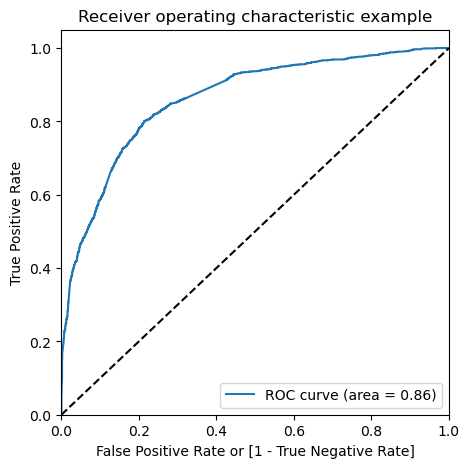

In [79]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.86 which is quite good. The model is doing good. 

In [80]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.333988,0,1,1,1,1,0,0,0,0,0,0
1,0,0.147861,0,1,1,0,0,0,0,0,0,0,0
2,1,0.132860,0,1,1,0,0,0,0,0,0,0,0
3,1,0.295894,0,1,1,1,0,0,0,0,0,0,0
4,1,0.962771,1,1,1,1,1,1,1,1,1,1,1


In [81]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.521408  0.996743  0.079585
0.2   0.2  0.703878  0.938576  0.485727
0.3   0.3  0.768213  0.862727  0.680363
0.4   0.4  0.789061  0.810144  0.769464
0.5   0.5  0.784129  0.733830  0.830882
0.6   0.6  0.772921  0.669148  0.869377
0.7   0.7  0.735485  0.542113  0.915225
0.8   0.8  0.712172  0.452303  0.953720
0.9   0.9  0.644026  0.277804  0.984429


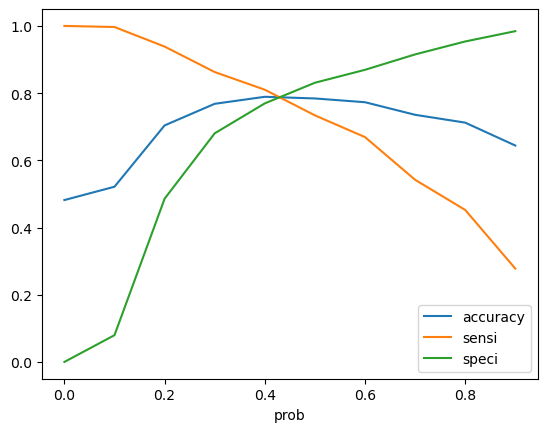

In [82]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [83]:
# Since 0.42 is where the optimal value is 

y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.333988,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.147861,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.132860,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.295894,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.962771,1,1,1,1,1,1,1,1,1,1,1,1


In [84]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7924232234924905

In [85]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1819,  493],
       [ 433, 1716]], dtype=int64)

In [86]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [87]:
# Calculate Sensitivity

TP/(TP+FN)

0.798510935318753

In [88]:
# Calculate Specificity

TN/(TN+FP)

0.7867647058823529

### ## Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [89]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [90]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
4771,0.000000,0.000000,1,0,0,0,0,0,0,0,1,0,0,1,0
6122,0.027888,0.029049,0,0,0,0,0,0,0,1,0,0,0,0,0
9202,0.015936,0.416813,0,0,0,0,0,0,0,1,0,0,0,1,0
6570,0.011952,0.378961,0,0,0,1,0,0,0,1,0,0,0,1,0
2668,0.031873,0.395246,0,0,0,0,0,0,0,1,0,0,0,0,0


In [91]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [92]:
# Check X_test_sm

X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
4771,1.0,0.000000,0.000000,1,0,0,0,0,0,0,0,1,0,0,1,0
6122,1.0,0.027888,0.029049,0,0,0,0,0,0,0,1,0,0,0,0,0
9202,1.0,0.015936,0.416813,0,0,0,0,0,0,0,1,0,0,0,1,0
6570,1.0,0.011952,0.378961,0,0,0,1,0,0,0,1,0,0,0,1,0
2668,1.0,0.031873,0.395246,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,0.011952,0.027289,0,0,0,0,0,0,0,1,0,0,0,0,0
6583,1.0,0.011952,0.152289,0,0,0,0,0,0,0,1,0,0,0,1,0
5531,1.0,0.055777,0.702025,0,0,0,0,0,0,0,1,0,0,0,0,0
3056,1.0,0.011952,0.417694,0,0,0,1,0,0,0,1,0,0,0,1,0


In [93]:
# Drop the required columns from X_test as well

cols_to_drop= ['Last Notable Activity_Had a Phone Conversation', 'What is your current occupation_Working Professional', 'Last Activity_Had a Phone Conversation']
X_test.drop(columns=cols_to_drop, inplace=True)

In [94]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [95]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [96]:
# Let's see the head

y_pred_1.head()

,0
4771,0.996941
6122,0.135221
9202,0.734776
6570,0.352204
2668,0.451167


In [97]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [98]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [99]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [100]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.996941
1,0,0.135221
2,0,0.734776
3,1,0.352204
4,1,0.451167


In [101]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [102]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.996941
1,0,0.135221
2,0,0.734776
3,1,0.352204
4,1,0.451167


In [103]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [104]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.996941,1
1,0,0.135221,0
2,0,0.734776,1
3,1,0.352204,0
4,1,0.451167,1


In [105]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7834728033472803

In [106]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[778, 218],
       [196, 720]], dtype=int64)

In [107]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [108]:
# Calculate sensitivity
TP / float(TP+FN)

0.7860262008733624

In [109]:
# Calculate specificity
TN / float(TN+FP)

0.7811244979919679

## Precision-Recall View

Let's now also build the training model using the precision-recall view

Precision

In [110]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8013211382113821

Re-call

In [111]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8013211382113821

Precision and recall tradeoff

In [112]:
from sklearn.metrics import precision_recall_curve

In [113]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int32,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [114]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

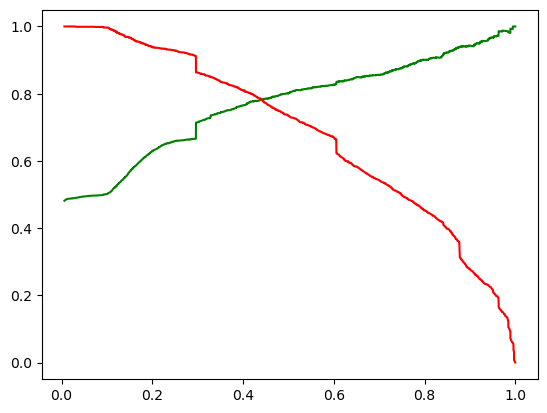

In [115]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [116]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.333988,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.147861,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.132860,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.295894,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.962771,1,1,1,1,1,1,1,1,1,1,1,1


In [117]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7908540685944856

In [118]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1847,  465],
       [ 468, 1681]], dtype=int64)

In [119]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [120]:
# Calculate Precision

TP/(TP+FP)

0.7833178005591799

In [121]:
# Calculate Recall

TP/(TP+FN)

0.7822242903676129

## 6. Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [122]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [123]:
y_test_pred[:10]

4771    0.996941
6122    0.135221
9202    0.734776
6570    0.352204
2668    0.451167
4233    0.823989
3368    0.712907
9091    0.474569
5972    0.112445
3631    0.810763
dtype: float64

In [124]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [125]:
# Let's see the head

y_pred_1.head()

,0
4771,0.996941
6122,0.135221
9202,0.734776
6570,0.352204
2668,0.451167


In [126]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [127]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [128]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [129]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,1,0.996941
1,0,0.135221
2,0,0.734776
3,1,0.352204
4,1,0.451167


In [130]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [131]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,1,0.996941
1,0,0.135221
2,0,0.734776
3,1,0.352204
4,1,0.451167


In [132]:
# Make predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [133]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.996941,1
1,0,0.135221,0
2,0,0.734776,1
3,1,0.352204,0
4,1,0.451167,1


In [134]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7855648535564853

In [135]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[793, 203],
       [207, 709]], dtype=int64)

In [136]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [146]:
# Calculate sensitivity
TP / float(TP+FN) 

0.7740174672489083

In [147]:
# Calculate specificity
TN / float(TN+FP)

0.7961847389558233

In [148]:
# Calculate Precision

TP/(TP+FP)

0.7774122807017544

In [138]:
# Calculate Recall

TP/(TP+FN)

0.7740174672489083

In [144]:
# Extract coefficients and p-values
coefficients = res.params
p_values = res.pvalues

In [145]:
feature_importance = pd.DataFrame({
    'Feature': coefficients.index,
    'Coefficient': coefficients.values,
    'P-Value': p_values.values
}).sort_values(by='Coefficient', ascending=False)

print(feature_importance)

                                       Feature  Coefficient  P-Value
1                                  TotalVisits        10.95     0.00
2                  Total Time Spent on Website         4.41     0.00
3                    Lead Origin_Lead Add Form         4.25     0.00
12           Last Notable Activity_Unreachable         2.74     0.00
5                 Lead Source_Welingak Website         2.19     0.03
10         Last Notable Activity_Email Bounced         2.08     0.01
4                       Lead Source_Olark Chat         1.42     0.00
11              Last Notable Activity_SMS Sent         1.29     0.00
0                                        const         0.24     0.21
6                             Do Not Email_Yes        -1.42     0.00
7                  Last Activity_Email Bounced        -1.47     0.03
8      What is your current occupation_Student        -2.38     0.00
9   What is your current occupation_Unemployed        -2.53     0.00
